In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import os

In [2]:
muc_mean=pd.read_csv("Fig18_muc_mean.txt",sep="\s+")
muc=pd.read_csv("Fig18_mu_8.txt",sep="\s+")
dfn=pd.read_csv("Fig18_8.txt",sep="\s+")

In [3]:
def func1(mq,d,N):
    mbar=mq/((2*d)**(1/2))
    lambdabar=mbar+((mbar**2+1)**(1/2))
    val=(1/2.0)*(lambdabar**N)*((2.0*d)**(N/2.0))
    return np.arcsinh(val)

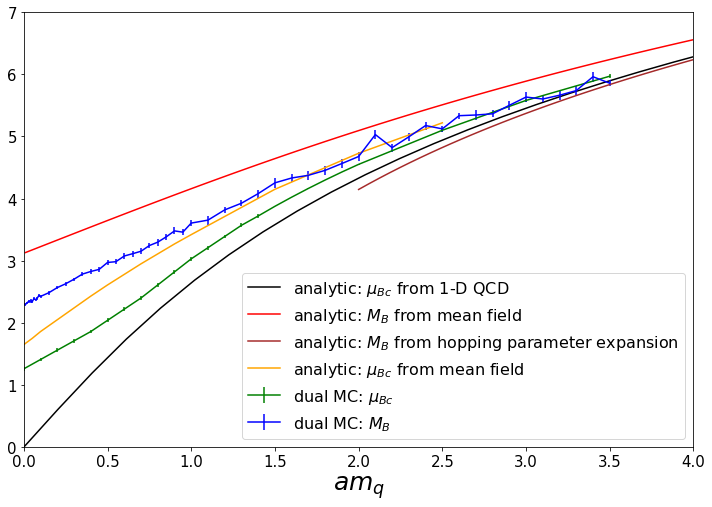

In [4]:
plt.figure(figsize=(12,8))
x=np.linspace(0.01,4,50)
y1=func1(x,4,3)
x_out1 = np.linspace(4,10, 50)
x_out = np.linspace(0,10, 50)
plt.errorbar(muc_mean['mq'], muc_mean['muc'], color="orange" ,label=r"analytic: $\mu_{Bc}$ from mean field")
plt.errorbar(muc['mq'], muc['muc']*3, yerr=muc['mucerr']*3, color="green", ecolor="green",label=r"dual MC: $\mu_{Bc}$")
plt.plot(x_out,np.arcsinh(x_out)*3,color='black',label=r'analytic: $\mu_{Bc}$ from 1-D QCD')
plt.plot(x,y1,color='red',label=r'analytic: $M_B$ from mean field')
plt.errorbar(dfn['#3.mq'],dfn["fin"],yerr=dfn["finerr"],ecolor='blue',color='blue',label=r"dual MC: $M_B$")
plt.plot(x_out1/2,np.log((x_out1**3*(x_out1**3-2))/(x_out1**3-5/4)),color='brown',label=r'analytic: $M_B$ from hopping parameter expansion')
plt.legend(fontsize=16)
plt.xlabel(r'$am_q$', fontsize=25)
plt.xlim(0,4)
plt.ylim(0,7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()